In [1]:
import keras
print(f"Keras Version: {keras.__version__}")
import tensorflow as tf
print(f"Tensorflow Version {tf.__version__}")

Using TensorFlow backend.


Keras Version: 2.0.4
Tensorflow Version 1.1.0


[Keras](https://keras.io/) is a high level wrapper (API) for Tensorflow and Theano which aims to make them easier to use. Tensorflow gets quite verbose and there is a lot of detail to handle, which Keras trys to abstract away to sane defaults, while allowing the option to tinker with the tensors where wanted.

# the data

To get a feel for Keras, I'm seeing how it goes with MNIST. 

Keras already has some [datasets included](https://keras.io/datasets/), so using the ever popular mnist:

> ** MNIST database of handwritten digits**

> Dataset of 60,000 28x28 grayscale images of the 10 digits, along with a test set of 10,000 images.

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Checking the data:

In [3]:
f"Shapes x_train: {x_train.shape}, y_train: {y_train.shape}, x_test: {x_test.shape}, y_test: {y_test.shape}"

'Shapes x_train: (60000, 28, 28), y_train: (60000,), x_test: (10000, 28, 28), y_test: (10000,)'

The train and test images are `28x28` sized images, which we need to reshape into a 1d vector to make our super simple NN deal with. 

Now, it's a good idea to always eyeball the data, so here goes:

In [33]:
# min to max values in x_train
x_train.min(), x_train.max()

(0, 255)

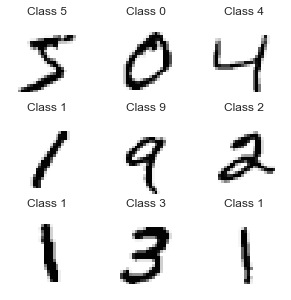

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3,3, figsize=(5,5))

for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i])
    ax.set_title(f"Class {y_train[i]}")
    ax.set_xticks([]) , ax.set_yticks([]) 

In [5]:
y_train[:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

ok, we've seen the data, but we need to preprocess it into a neural net friendly shape. 

## preprocessing the data

The image data is 60K `28x28` images, and the image test data is 10K `28x28` images. We want the number of images to stay the same, while the 28x28 should become 784. Since the data is just numpy arrays we can use [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html):

In [32]:
X_train = x_train.reshape(-1, 28*28)
X_test = x_test.reshape(-1, 28*28)
x_train.shape, X_train.shape, x_test.shape, X_test.shape

((60000, 28, 28), (60000, 784), (10000, 28, 28), (10000, 784))

that was easy! 

Now, often image data is normalized:

In [34]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train.min(), X_train.max()

(0.0, 1.0)

Moving on to the image labels:

the image labels are stored as a simple numpy array, with each entry telling us what number each corresponding drawing is. Since our NN will spit out a prediction of the likelyhood of what number the drawing is, our NN will work better with the y data [one hot encoded](https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science).

In [35]:
print("Existing image labels")
print(f"y_train: {y_train[:10]} | y_test: {y_test[:10]}")

from keras.utils import np_utils
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

print(f"Y_Train encoded: {Y_train[0]}")
print(f"Y_test encoded: {Y_test[0]}")

Existing image labels
y_train: [5 0 4 1 9 2 1 3 1 4] | y_test: [7 2 1 0 4 1 4 9 5 9]
Y_Train encoded: [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
Y_test encoded: [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


so now our data is all ready to go!

# A simple neural net

In [53]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
model = Sequential()

model.add(Dense(32, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.05))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# we can either use part of the training set as validation data or provide a validation set
model.fit(X_train, Y_train, epochs=5, batch_size=128, shuffle=True, validation_split=0.05)

#model.fit(X_train, Y_train, epochs=10, batch_size=128, shuffle=True, validation_data=(X_test,Y_test))

Train on 57000 samples, validate on 3000 samples
Epoch 1/5
57000/57000 [==============================] - 2s - loss: 0.5113 - acc: 0.8507 - val_loss: 0.1846 - val_acc: 0.9473
Epoch 2/5
57000/57000 [==============================] - 2s - loss: 0.2514 - acc: 0.9245 - val_loss: 0.1419 - val_acc: 0.9613
Epoch 3/5
57000/57000 [==============================] - 2s - loss: 0.2007 - acc: 0.9401 - val_loss: 0.1184 - val_acc: 0.9663
Epoch 4/5
57000/57000 [==============================] - 2s - loss: 0.1730 - acc: 0.9476 - val_loss: 0.1033 - val_acc: 0.9707
Epoch 5/5
57000/57000 [==============================] - 2s - loss: 0.1534 - acc: 0.9529 - val_loss: 0.0959 - val_acc: 0.9753


In [56]:
model.evaluate(X_test, Y_test, batch_size=256)

 9472/10000 [===========================>..] - ETA: 0s

[0.12318717645853758, 0.9627]

and viola, this super simple NN gets 96% accuracy!

In [58]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 32)                25120     
_________________________________________________________________
activation_31 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                2112      
_________________________________________________________________
activation_32 (Activation)   (None, 64)                0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                650       
__________

In [64]:
model.history.keys

AttributeError: 'Sequential' object has no attribute 'history'